This script will load a file full of NBA statistics for each player-year from the 2013-14 season through the 2021-22 season.

Then, using Linear Regression with the following predictor and response variables, we'll attempt to find model coefficients that will allow us to predict whether a player with certain stats is likely to make the All NBA team.

  Predictor variables:
  
      Points Per Game
      Minutes Played
      True Shooting %
      Rebounds
      Usage Rate

  Response variable:

      Probability of being all_nba

First, let's load up necessary modules along with all of our clean NBA stats.

Years I have data for: 2013 - 2022.

In [129]:
from ipywidgets import interact, FloatSlider
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
 
# filename of player data
filename = 'All_Player_Stats_All_Years.csv'

all_player_data_df = pd.read_csv(filename)

We all know about linear regression, so rather than bore you with "And here's my model!", I'd like to first show some interesting
behavior I noticed when devloping the model.  To see this, let's first just look at a particular variable - Minutes Per Game - and
note how it's related to whether someone made the All-NBA game.

Note:  Only 15 players make the All-NBA team each year, out of approximately 500 or so active players in any given year.

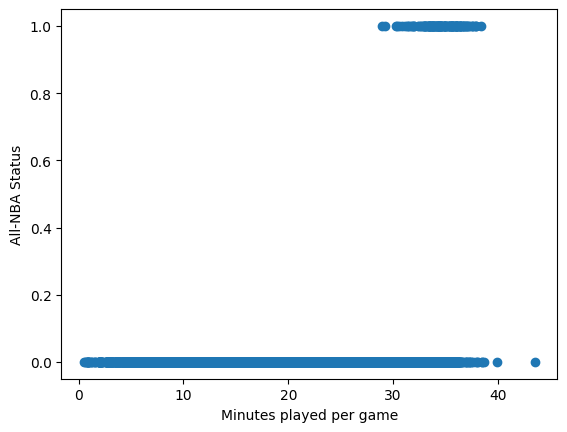

In [130]:
plt.scatter(all_player_data_df["MPG"], all_player_data_df["ALL_NBA"]);
plt.xlabel("Minutes played per game");
plt.ylabel("All-NBA Status");

So, clearly, if you're an an All-NBA player, you're playing heavy minutes.

Let's run a single variable regression on this data to see how strongly correlated MPG is with All-NBA status, though.

Stats for hypothetical player:
MPG: 40
Model prediction as to whether the player will be All-NBA:
[0.1327941]


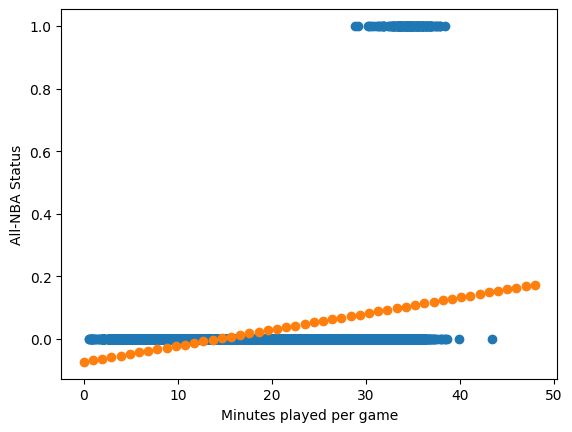

In [131]:
# first let's show the previous plot
plt.scatter(all_player_data_df["MPG"], all_player_data_df["ALL_NBA"]);
plt.xlabel("Minutes played per game");
plt.ylabel("All-NBA Status");

# Now use single variable regression to build a prediction function and then plot that output over 0 - 48 MPG
model_matrix_df = all_player_data_df.loc[:, ['MPG']]
model_matrix = model_matrix_df.to_numpy()
response_variable = all_player_data_df.loc[:, 'ALL_NBA']

fit = LinearRegression().fit(model_matrix, response_variable)

# Leaving this out for now
#print(fit.intercept_)
#print(fit.coef_)

mpg_prediction = 40

print("Stats for hypothetical player:")
print("MPG: " + str(mpg_prediction))

print("Model prediction as to whether the player will be All-NBA:")
    
# single variable prediction
print(fit.predict(np.asarray([[mpg_prediction]])))

mpg_array = np.linspace(0, 48, num=50)
num_of_elements = len(mpg_array)

all_nba_prediction = fit.predict(np.c_[mpg_array])

plt.scatter(mpg_array, all_nba_prediction);

It turns out that Minutes Played Per Game is loosely correlated with All-NBA status.

Let's see how this fit changes as we add a predictor into our model.  Let's add Points Per Game to the model, and then plot our prediction as MPG changes and PPG is held constant at some reasonable value for an All-NBA player.  We'll choose 25 PPG.

Stats for hypothetical player:
PPG: 25
MPG: 30
Model prediction as to whether the player will be All-NBA:
[0.34668417]


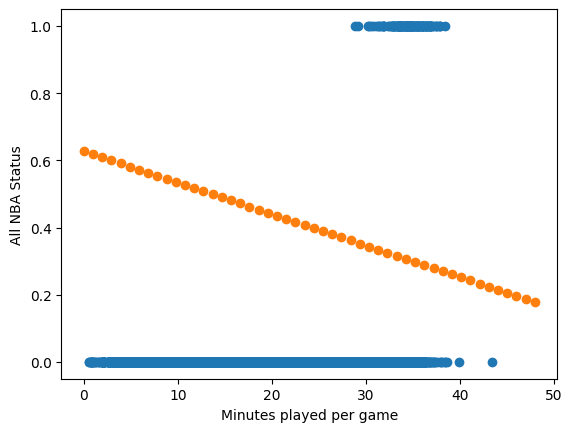

In [132]:
# multiple variable regression - 2 variables
model_matrix_df = all_player_data_df.loc[:, ['PPG','MPG']]
model_matrix = model_matrix_df.to_numpy()
response_variable = all_player_data_df.loc[:, 'ALL_NBA']

fit = LinearRegression().fit(model_matrix, response_variable)

ppg_prediction = 25
mpg_prediction = 30

print("Stats for hypothetical player:")
print("PPG: " + str(ppg_prediction))
print("MPG: " + str(mpg_prediction))

print("Model prediction as to whether the player will be All-NBA:")
    
# multi-variable prediction
print(fit.predict(np.asarray([[ppg_prediction, mpg_prediction]])))

# let's look at some variables on plots

# first let's just plot All NBA status vs. MPG
plt.scatter(all_player_data_df["MPG"], all_player_data_df["ALL_NBA"]);
plt.xlabel("Minutes played per game");
plt.ylabel("All NBA Status");

mpg_array = np.linspace(0, 48, num=50)
num_of_elements = len(mpg_array)

# now let's see our predicted fit with that data
# constant value of ppg
x = np.full(num_of_elements, ppg_prediction)
o = np.argsort(x)
ppg_array = x[o]

all_nba_prediction = fit.predict(np.c_[ppg_array, mpg_array])

plt.scatter(mpg_array, all_nba_prediction);


What?!  Now, I don't know about you, but this sudden flip to a *negative* correlation between MPG and All-NBA status really surprised me at first.  I mean, after all, *nobody* who plays less than around 28 MPG on average is All-NBA, and yet the regression is finding a solution that gives you a higher chance of being named to the All-NBA team the *less* minutes you played!  What's going on here?!

So, I thought about this a little bit, and the answer is that I added Points Per Game into the model, which, when combined with MPG, can be combined to give you a measure of efficiency.  Regression produced a function that tells us about *player efficiency* without having to explicitly derive a statistic to encapsulate that notion directly.  It's given us insight into how the two predictors, when put together, influence overall quality of play as measured by being elected to the elite All-NBA team, without ever having to consider player efficiency when *building the model*.  I learned about player efficiency by examining the solution that Linear Regression gave me.

This shows, in a simple way, the power of regression.  In this particular instance, I was able to come up with - after the fact, looking at some of the output, and with a little bit of thought - an explanation for the behavior of the model.  But this was with *two* predictors whose individual meanings were well understood.  What about 3?  Or 4?  Or 1000?  Or when the predictors don't seem so clearly related to the response variable, so no 'sensible' correlation can be easily drawn?  It's clear that as your models get the slightest degree of complexity, regression techniques have the potential to converge on *interesting solutions* by combining the available data together in a way that humans may not ever be able to do; teasing out surprising relationships... much the same way the MPG to All-NBA relationship so shockingly flipped on me, in my 1 predictor to 2 predictor step-up in complexity.

In [133]:
# multiple variable regression
model_matrix_df = all_player_data_df.loc[:, ['PPG', 'USG', 'MPG', 'TS', 'RPG']]
model_matrix = model_matrix_df.to_numpy()
response_variable = all_player_data_df.loc[:, 'ALL_NBA']

fit = LinearRegression().fit(model_matrix, response_variable)

#print(fit.intercept_)
#print(fit.coef_)

ppg_prediction = 20
usg_prediction = 20
mpg_prediction = 30
ts_prediction = .60
rpg_prediction = 4

print("Stats for hypothetical player:")
print("PPG: " + str(ppg_prediction))
print("USG: " + str(usg_prediction))
print("MPG: " + str(mpg_prediction))
print("TS: " + str(ts_prediction))
print("RPG: " + str(rpg_prediction))

print("Model prediction as to whether the player will be All-NBA:")
    
# multi-variable prediction
print(fit.predict(np.asarray([[ppg_prediction, usg_prediction, mpg_prediction, ts_prediction, rpg_prediction]])))

# print query for us to run against our CSV file for checking to see if our predictions are reasonable
print("SELECT * WHERE a16 > " + str(ppg_prediction) + " & a7 > " + str(usg_prediction) + " & a5 > " + str(mpg_prediction) + " & a15 > " + str(ts_prediction) + " & a17 > " + str(rpg_prediction))

Stats for hypothetical player:
PPG: 20
USG: 20
MPG: 30
TS: 0.6
RPG: 4
Model prediction as to whether the player will be All-NBA:
[0.2529699]
SELECT * WHERE a16 > 20 & a7 > 20 & a5 > 30 & a15 > 0.6 & a17 > 4


When I take that SQL query and run it against the data, I get 65 results, 45 of whom were All-NBA players during the years they hit those stats, for a ratio of 45/65 = 69% ! (Nice)

While the model isn't giving completely bonkers predictions, it's clearly not totally capturing all of the different things that go into whether a particular player is elected to the All-NBA team or not.

One thing that occurs to me is that different stats are viewed differently depending upon position.  This model is not taking into account position at all, and breaking apart the sample groups into positional sets may give better results.  Let's see if that's the case.

In [134]:
# The All-NBA currently has a structure of 2 guards, 2 forwards, and 1 center.  The data has a different breakdown of position groupings, as given by the following output
positions = all_player_data_df['POS'].unique()

print(positions)

['SF' 'C' 'PF' 'SG' 'PG' 'G-F' 'G' 'F' 'SG-PG' 'SG-SF' 'C-F' 'F-C' 'F-G']


In [135]:
# So, to break apart our dataset, we need to map the data groups to the 3 positions on an All-NBA Team.and
# This isn't a long or extensive map, so I won't try to be clever.

# Break apart dataframe into position-specific dataframes for further processing.
guard_data_df = all_player_data_df[
    (all_player_data_df['POS'] == 'SG') |
    (all_player_data_df['POS'] == 'PG') |
    (all_player_data_df['POS'] == 'G-F') |
    (all_player_data_df['POS'] == 'G') |
    (all_player_data_df['POS'] == 'SG-PG') |
    (all_player_data_df['POS'] == 'SG-SF') |
    (all_player_data_df['POS'] == 'F-G')
]

forward_data_df = all_player_data_df[
    (all_player_data_df['POS'] == 'SF') |
    (all_player_data_df['POS'] == 'PF') |
    (all_player_data_df['POS'] == 'G-F') |
    (all_player_data_df['POS'] == 'F') |
    (all_player_data_df['POS'] == 'SG-SF') |
    (all_player_data_df['POS'] == 'C-F') |
    (all_player_data_df['POS'] == 'F-G')
]

center_data_df = all_player_data_df[
    (all_player_data_df['POS'] == 'C') |
    (all_player_data_df['POS'] == 'C-F') |
    (all_player_data_df['POS'] == 'F-C')
]

In [136]:
# multiple variable linear regression on guard-only data
model_matrix_df = guard_data_df.loc[:, ['PPG', 'USG', 'MPG', 'TS', 'RPG']]
model_matrix = model_matrix_df.to_numpy()
response_variable = guard_data_df.loc[:, 'ALL_NBA']

fit = LinearRegression().fit(model_matrix, response_variable)

ppg_prediction = 20
usg_prediction = 20
mpg_prediction = 30
ts_prediction = .60
rpg_prediction = 4

print("Stats for hypothetical guard:")
print("\tPPG: " + str(ppg_prediction))
print("\tUSG: " + str(usg_prediction))
print("\tMPG: " + str(mpg_prediction))
print("\tTS: " + str(ts_prediction))
print("\tRPG: " + str(rpg_prediction))

print("Model prediction as to whether the guard will be All-NBA:")
    
# multi-variable prediction
prediction = fit.predict(np.asarray([[ppg_prediction, usg_prediction, mpg_prediction, ts_prediction, rpg_prediction]]))
print("\t" + (str(prediction)))

Stats for hypothetical guard:
	PPG: 20
	USG: 20
	MPG: 30
	TS: 0.6
	RPG: 4
Model prediction as to whether the guard will be All-NBA:
	[0.23878455]


In [137]:
# multiple variable linear regression on forward-only data
model_matrix_df = forward_data_df.loc[:, ['PPG', 'USG', 'MPG', 'TS', 'RPG']]
model_matrix = model_matrix_df.to_numpy()
response_variable = forward_data_df.loc[:, 'ALL_NBA']

fit = LinearRegression().fit(model_matrix, response_variable)

ppg_prediction = 20
usg_prediction = 20
mpg_prediction = 30
ts_prediction = .60
rpg_prediction = 4

print("Stats for hypothetical forward:")
print("\tPPG: " + str(ppg_prediction))
print("\tUSG: " + str(usg_prediction))
print("\tMPG: " + str(mpg_prediction))
print("\tTS: " + str(ts_prediction))
print("\tRPG: " + str(rpg_prediction))

print("Model prediction as to whether the forward will be All-NBA:")
    
# multi-variable prediction
prediction = fit.predict(np.asarray([[ppg_prediction, usg_prediction, mpg_prediction, ts_prediction, rpg_prediction]]))
print("\t" + (str(prediction)))

Stats for hypothetical forward:
	PPG: 20
	USG: 20
	MPG: 30
	TS: 0.6
	RPG: 4
Model prediction as to whether the forward will be All-NBA:
	[0.29073709]


In [138]:
# multiple variable linear regression on center-only data
model_matrix_df = center_data_df.loc[:, ['PPG', 'USG', 'MPG', 'TS', 'RPG']]
model_matrix = model_matrix_df.to_numpy()
response_variable = center_data_df.loc[:, 'ALL_NBA']

fit = LinearRegression().fit(model_matrix, response_variable)

ppg_prediction = 20
usg_prediction = 20
mpg_prediction = 30
ts_prediction = .60
rpg_prediction = 4

print("Stats for hypothetical center:")
print("\tPPG: " + str(ppg_prediction))
print("\tUSG: " + str(usg_prediction))
print("\tMPG: " + str(mpg_prediction))
print("\tTS: " + str(ts_prediction))
print("\tRPG: " + str(rpg_prediction))

print("Model prediction as to whether the center will be All-NBA:")
    
# multi-variable prediction
prediction = fit.predict(np.asarray([[ppg_prediction, usg_prediction, mpg_prediction, ts_prediction, rpg_prediction]]))
print("\t" + (str(prediction)))

Stats for hypothetical center:
	PPG: 20
	USG: 20
	MPG: 30
	TS: 0.6
	RPG: 4
Model prediction as to whether the center will be All-NBA:
	[0.13610531]


In [139]:
@interact(
    ppg_prediction = FloatSlider(value=20, min=0, max=60, step=1, description = "PPG"),
    usg_prediction = FloatSlider(value=20.0, min=0.0, max=100.0, step=.1, description = "USG"),
    mpg_prediction = FloatSlider(value=30.0, min = 0.0, max = 48.0, step = .5, description = "MPG"),
    ts_prediction = FloatSlider(value=0.60, min = 0.0, max = 1.0, step = .01, description = "TS"),
    rpg_prediction = FloatSlider(value=4, min = 0.0, max = 30.0, step = 1, description = "RPG"),
)
def plot_normal_density(ppg_prediction, usg_prediction, mpg_prediction, ts_prediction, rpg_prediction):
    print("Model prediction as to whether the center will be All-NBA:")
    print("")
    prediction = fit.predict(np.asarray([[ppg_prediction, usg_prediction, mpg_prediction, ts_prediction, rpg_prediction]]))
    print("\t" + (str(prediction)))


interactive(children=(FloatSlider(value=20.0, description='PPG', max=60.0, step=1.0), FloatSlider(value=20.0, …

This is kinda cool for exploring the parameter space.

Notice what happens when we push 'PPG' or 'MPG' too far.   In best Rick James voice:  "Linear extrapolation is a hell of a drug."

Due to the fact that I am not generating a 'true' probability using linear regression - I'm just trying to find a fit to a binary response variable.  My intuition tells me that the solutions should be somewhat close to the probability of the response variable turning up true, but we didn't exactly cover this in class.

I decided it might be nice to try logistic regression for a binary true/false prediction response and build confusion matrices to see how the model did on the sample data.

In [140]:
# Logistic regression for guards
model_matrix_df = guard_data_df.loc[:, ['PPG', 'USG', 'MPG', 'TS', 'RPG']]
model_matrix = model_matrix_df.to_numpy()
response_variable = guard_data_df.loc[:, 'ALL_NBA']

logistic_fit = LogisticRegression().fit(model_matrix, response_variable)

# Feed the data you used to generate the model back into the model to get predictions
logistic_prediction = logistic_fit.predict(model_matrix)

# Now calculate the confusion matrix
cm_guards = confusion_matrix(guard_data_df['ALL_NBA'], logistic_prediction)

print("Confusion matrix for guards:")
print(cm_guards / np.sum(cm_guards))

Confusion matrix for guards:
[[0.96895273 0.00509731]
 [0.01251158 0.01343837]]


In [141]:
# Logistic regression for forwards
model_matrix_df = forward_data_df.loc[:, ['PPG', 'USG', 'MPG', 'TS', 'RPG']]
model_matrix = model_matrix_df.to_numpy()
response_variable = forward_data_df.loc[:, 'ALL_NBA']

logistic_fit = LogisticRegression().fit(model_matrix, response_variable)

# Feed the data you used to generate the model back into the model to get predictions
logistic_prediction = logistic_fit.predict(model_matrix)

# Now calculate the confusion matrix
cm_forwards = confusion_matrix(forward_data_df['ALL_NBA'], logistic_prediction)

print("Confusion matrix for forwards:")
print(cm_forwards / np.sum(cm_forwards))

Confusion matrix for forwards:
[[0.96421371 0.00453629]
 [0.01058468 0.02066532]]


In [142]:
# Logistic regression for centers
model_matrix = center_data_df.loc[:, ['PPG', 'USG', 'MPG', 'TS', 'RPG']]
response_variable = center_data_df.loc[:, 'ALL_NBA']
logistic_fit = LogisticRegression().fit(model_matrix, response_variable)

# Feed the data you used to generate the model back into the model to get predictions
logistic_prediction = logistic_fit.predict(model_matrix)

# Now calculate the confusion matrix
cm_centers = confusion_matrix(center_data_df['ALL_NBA'], logistic_prediction)

print("Confusion matrix for centers:")
print(cm_centers / np.sum(cm_centers))

Confusion matrix for centers:
[[0.9596577  0.00855746]
 [0.02200489 0.00977995]]


The model found using logistic regression is better but still kinda sucks.  If you were going to use this model to bet whether or not a particular person is going to make the All-NBA team, your hit rate would be only *slightly* better than your miss rate.  Not nearly good enough.

Ideas for improvement:
- Team wins is something that would be interesting to build in, but there are some data cleaning steps to doing that which make it difficult to do.  I could just throw out all players that were traded as a simple way to get past the hurdle but I'm not sure if that is a valid thing to do from a statistics perspective.
- I think there is a psychological effect at play here where people who are 'expected' to be All NBA are more likely to be All NBA.  Building a binary column that said 'All NBA Last Year?' and then using that as a predictor might help improve model accuracy.. the idea being that the expectation that someone will make All NBA is likely well correlated with them actually having made the All NBA team before.

In [143]:
# Let's see if we can calculate a column labelled 'ALL_NBA_PY' for All NBA in the Prior Year, and then use that data to get a fit

# I had some code here but I decided since it was just data manipulation I'd put it in it's own file and just load the new data with 
# the calculated column right out of a csv file

# filename of player data
filename = 'All_Player_Stats_All_Years_With_Prior_Year.csv'

all_player_data_with_py_df = pd.read_csv(filename)

# So, to break apart our dataset, we need to map the data groups to the 3 positions on an All-NBA Team.and
# This isn't a long or extensive map, so I won't try to be clever.

# Break apart dataframe into position-specific dataframes for further processing.
guard_data_df = all_player_data_with_py_df[
    (all_player_data_with_py_df['POS'] == 'SG') |
    (all_player_data_with_py_df['POS'] == 'PG') |
    (all_player_data_with_py_df['POS'] == 'G-F') |
    (all_player_data_with_py_df['POS'] == 'G') |
    (all_player_data_with_py_df['POS'] == 'SG-PG') |
    (all_player_data_with_py_df['POS'] == 'SG-SF') |
    (all_player_data_with_py_df['POS'] == 'F-G')
]

forward_data_df = all_player_data_with_py_df[
    (all_player_data_with_py_df['POS'] == 'SF') |
    (all_player_data_with_py_df['POS'] == 'PF') |
    (all_player_data_with_py_df['POS'] == 'G-F') |
    (all_player_data_with_py_df['POS'] == 'F') |
    (all_player_data_with_py_df['POS'] == 'SG-SF') |
    (all_player_data_with_py_df['POS'] == 'C-F') |
    (all_player_data_with_py_df['POS'] == 'F-G')
]

center_data_df = all_player_data_with_py_df[
    (all_player_data_with_py_df['POS'] == 'C') |
    (all_player_data_with_py_df['POS'] == 'C-F') |
    (all_player_data_with_py_df['POS'] == 'F-C')
]

In [144]:
# Logistic regression for guards with prior year All-NBA status considered
model_matrix_df = guard_data_df.loc[:, ['PPG', 'USG', 'MPG', 'TS', 'RPG', 'ALL_NBA_PY']]
model_matrix = model_matrix_df.to_numpy()
response_variable = guard_data_df.loc[:, 'ALL_NBA']

logistic_fit = LogisticRegression().fit(model_matrix, response_variable)

# Feed the data you used to generate the model back into the model to get predictions
logistic_prediction = logistic_fit.predict(model_matrix)

# Now calculate the confusion matrix
cm_guards_py = confusion_matrix(guard_data_df['ALL_NBA'], logistic_prediction)

print("Confusion matrix for guards:")
print(cm_guards / np.sum(cm_guards))

true_positive_ratio = round(cm_guards[1][1] / cm_guards[0][1], 1)
true_negative_ratio = round(cm_guards[0][0] / cm_guards[1][0], 1)

print("True/False Positive Ratio: " + str(true_positive_ratio))
print("True/False Negative Ratio: " + str(true_negative_ratio))

print("")
print("Confusion matrix for guards with prior year All-NBA considered:")
print(cm_guards_py / np.sum(cm_guards_py))

true_positive_ratio = round(cm_guards_py[1][1] / cm_guards_py[0][1], 1)
true_negative_ratio = round(cm_guards_py[0][0] / cm_guards_py[1][0], 1)

print("True/False Positive Ratio: " + str(true_positive_ratio))
print("True/False Negative Ratio: " + str(true_negative_ratio))


Confusion matrix for guards:
[[0.96895273 0.00509731]
 [0.01251158 0.01343837]]
True/False Positive Ratio: 2.6
True/False Negative Ratio: 77.4

Confusion matrix for guards with prior year All-NBA considered:
[[0.96941613 0.00463392]
 [0.01112141 0.01482854]]
True/False Positive Ratio: 3.2
True/False Negative Ratio: 87.2


In [145]:
# Logistic regression for forwards with prior year All-NBA status considered
model_matrix_df = forward_data_df.loc[:, ['PPG', 'USG', 'MPG', 'TS', 'RPG', 'ALL_NBA_PY']]
model_matrix = model_matrix_df.to_numpy()
response_variable = forward_data_df.loc[:, 'ALL_NBA']

logistic_fit = LogisticRegression().fit(model_matrix, response_variable)

# Feed the data you used to generate the model back into the model to get predictions
logistic_prediction = logistic_fit.predict(model_matrix)

# Now calculate the confusion matrix
cm_forwards_py = confusion_matrix(forward_data_df['ALL_NBA'], logistic_prediction)

print("Confusion matrix for forwards:")
print(cm_forwards / np.sum(cm_forwards))

true_positive_ratio = round(cm_forwards[1][1] / cm_forwards[0][1], 1)
true_negative_ratio = round(cm_forwards[0][0] / cm_forwards[1][0], 1)

print("True/False Positive Ratio: " + str(true_positive_ratio))
print("True/False Negative Ratio: " + str(true_negative_ratio))

print("")
print("Confusion matrix for forwards with prior year All-NBA considered:")
print(cm_forwards_py / np.sum(cm_forwards_py))

true_positive_ratio = round(cm_forwards_py[1][1] / cm_forwards_py[0][1], 1)
true_negative_ratio = round(cm_forwards_py[0][0] / cm_forwards_py[1][0], 1)

print("True/False Positive Ratio: " + str(true_positive_ratio))
print("True/False Negative Ratio: " + str(true_negative_ratio))

Confusion matrix for forwards:
[[0.96421371 0.00453629]
 [0.01058468 0.02066532]]
True/False Positive Ratio: 4.6
True/False Negative Ratio: 91.1

Confusion matrix for forwards with prior year All-NBA considered:
[[0.96320565 0.00554435]
 [0.00907258 0.02217742]]
True/False Positive Ratio: 4.0
True/False Negative Ratio: 106.2


In [146]:
# Logistic regression for centers with prior year All-NBA status considered
model_matrix_df = center_data_df.loc[:, ['PPG', 'USG', 'MPG', 'TS', 'RPG', 'ALL_NBA_PY']]
model_matrix = model_matrix_df.to_numpy()
response_variable = center_data_df.loc[:, 'ALL_NBA']

logistic_fit = LogisticRegression().fit(model_matrix, response_variable)

# Feed the data you used to generate the model back into the model to get predictions
logistic_prediction = logistic_fit.predict(model_matrix)

# Now calculate the confusion matrix
cm_centers_py = confusion_matrix(center_data_df['ALL_NBA'], logistic_prediction)

print("Confusion matrix for centers:")
print(cm_centers / np.sum(cm_centers))

true_positive_ratio = round(cm_centers[1][1] / cm_centers[0][1], 1)
true_negative_ratio = round(cm_centers[0][0] / cm_centers[1][0], 1)

print("True/False Positive Ratio: " + str(true_positive_ratio))
print("True/False Negative Ratio: " + str(true_negative_ratio))

print("")
print("Confusion matrix for centers with prior year All-NBA considered:")
print(cm_centers_py / np.sum(cm_centers_py))

true_positive_ratio = round(cm_centers_py[1][1] / cm_centers_py[0][1], 1)
true_negative_ratio = round(cm_centers_py[0][0] / cm_centers_py[1][0], 1)

print("True/False Positive Ratio: " + str(true_positive_ratio))
print("True/False Negative Ratio: " + str(true_negative_ratio))



Confusion matrix for centers:
[[0.9596577  0.00855746]
 [0.02200489 0.00977995]]
True/False Positive Ratio: 1.1
True/False Negative Ratio: 43.6

Confusion matrix for centers with prior year All-NBA considered:
[[0.9608802  0.00733496]
 [0.0207824  0.01100244]]
True/False Positive Ratio: 1.5
True/False Negative Ratio: 46.2
